<a href="https://colab.research.google.com/github/shravanimamidala/hello_world/blob/master/FinalHack_Version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objectives**

**Problem Statement:**
Due to Broadband outages,'India Braodband' company is facing customer churn.
* Our target attribute is 'outage_duration'. 
* It is a Multi-class classification problem where target classifies into 3 classes.

> *  `0` for no outage, 
* `1` for short outages that last anywhere between a
few minutes and a maximum of 2 hours,
* `2` for long outages that can last from 2 hours to sometimes even a couple of days.



We have to better handle outages and improve customer satisfaction and therefore reduce customer churn.
* Evaluation Metric is '**F1 Score**'
* In other words, We need to have more of **Class 0** to make customer continue our services.

**To get current working directory**

In [15]:
import os
os.getcwd()

'/content'

In [2]:
#Module for importing files
import pandas as pd

#Module to ignore the warnings
import warnings
warnings.filterwarnings('ignore')

Here we have list of Null values as [" ","na","NA"] because Null values can be empty or may be represented with NA

In [3]:
broadband_data=pd.read_csv("/content/drive/MyDrive/FinalHack/broadband_data.csv",na_values=[" ","na","NA"])
outage_data=pd.read_csv("/content/drive/MyDrive/FinalHack/outage_data.csv",na_values=[" ","na","NA"])
report_data=pd.read_csv("/content/drive/MyDrive/FinalHack/report_data.csv",na_values=[" ","na","NA"])
server_data=pd.read_csv("/content/drive/MyDrive/FinalHack/server_data.csv",na_values=[" ","na","NA"])
train_data=pd.read_csv("/content/drive/MyDrive/FinalHack/train_data.csv",na_values=[" ","na","NA"])
test_data=pd.read_csv("/content/drive/MyDrive/FinalHack/test_data.csv",na_values=[" ","na","NA"])

# **Understanding the Data**

**Writing a custom function with all the Data Analysis to understand the data**

In [4]:
def Data_Analysis(data_file):
  print("CHECKING THE DIMENSIONS ")
  print("=========================================================== ")
  print(data_file.shape)
  print("CHECKING THE COLUMNS OF DATASET ")
  print("=========================================================== ")
  print(data_file.columns)
  print("                                           ")
  print("GETTING SUMMARY OF DATASET WHICH ARE NUMERICAL ")
  print("=========================================================== ")
  print(data_file.describe())
  print("                                           ")
  print("GETTING SUMMARY OF DATASET WHICH ARE CATEGORICAL ")
  print("=========================================================== ")
  print(data_file.describe(include='object'))
  print("GETTING DATA TYPES OF DATA SET ")
  print("=========================================================== ")
  print(data_file.dtypes)
  print("GETTING UNIQUE ELEMENTS OF DATASET COLUMN WISE ")
  print("=========================================================== ")
  print(data_file.nunique())
  print("GETTING NULL VALUES OF DATASET COLUMN WISE ")
  print("=========================================================== ")
  print(data_file.isnull().sum())

In [5]:
print('About broadband_data:\n')
Data_Analysis(broadband_data)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print('About outage_data:\n')
Data_Analysis(outage_data)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print('About report_data:\n')
Data_Analysis(report_data)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print('About server_data:\n')
Data_Analysis(server_data)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print('About train_data:\n')
Data_Analysis(train_data)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print('About test_data:\n')
Data_Analysis(test_data)

About broadband_data:

CHECKING THE DIMENSIONS 
(21076, 2)
CHECKING THE COLUMNS OF DATASET 
Index(['id', 'broadband_type'], dtype='object')
                                           
GETTING SUMMARY OF DATASET WHICH ARE NUMERICAL 
                 id
count  21076.000000
mean    9255.869330
std     5366.730222
min        1.000000
25%     4599.750000
50%     9256.500000
75%    13907.250000
max    18552.000000
                                           
GETTING SUMMARY OF DATASET WHICH ARE CATEGORICAL 
          broadband_type
count              21076
unique                10
top     broadband_type_8
freq               10268
GETTING DATA TYPES OF DATA SET 
id                 int64
broadband_type    object
dtype: object
GETTING UNIQUE ELEMENTS OF DATASET COLUMN WISE 
id                18552
broadband_type       10
dtype: int64
GETTING NULL VALUES OF DATASET COLUMN WISE 
id                0
broadband_type    0
dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Checking Dimensions and Columns of each data set

In [6]:
print('Dimensions of Broadband:\n',broadband_data.shape,'\n')
print('Dimensions of outage dataset:\n',outage_data.shape,'\n')
print('Dimensions of report dataset:\n',report_data.shape,'\n')
print('mDimensions of  server data set:\n',server_data.shape,'\n')
print('Dimensions of train dataset:\n',train_data.shape,'\n')
print('Dimensions of test dataset:\n',test_data.shape,'\n')

Dimensions of Broadband:
 (21076, 2) 

Dimensions of outage dataset:
 (18552, 2) 

Dimensions of report dataset:
 (58671, 3) 

mDimensions of  server data set:
 (31170, 2) 

Dimensions of train dataset:
 (5904, 3) 

Dimensions of test dataset:
 (1477, 2) 



In [7]:
print('Dimensions of Broadband:\n',broadband_data.columns,'\n')
print('Dimensions of outage dataset:\n',outage_data.columns,'\n')
print('Dimensions of report dataset:\n',report_data.columns,'\n')
print('mDimensions of  server data set:\n',server_data.columns,'\n')
print('Dimensions of train dataset:\n',train_data.columns,'\n')
print('Dimensions of test dataset:\n',test_data.columns,'\n')

Dimensions of Broadband:
 Index(['id', 'broadband_type'], dtype='object') 

Dimensions of outage dataset:
 Index(['id', 'outage_type'], dtype='object') 

Dimensions of report dataset:
 Index(['id', 'log_report_type', 'volume'], dtype='object') 

mDimensions of  server data set:
 Index(['id', 'transit_server_type'], dtype='object') 

Dimensions of train dataset:
 Index(['id', 'area_code', 'outage_duration'], dtype='object') 

Dimensions of test dataset:
 Index(['id', 'area_code'], dtype='object') 



#Pandas profiling for each Data Set
Using pandas profiling to view how the data is spread in all the data sets

In [ ]:
!pip install pandas-profiling==3.0.0

In [8]:
import pandas_profiling
from pandas_profiling import ProfileReport

In [9]:
pandas_profiling.ProfileReport(broadband_data, title='Profiling Report for BROAD BAND DATA')

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**About Broadband Data:**

* It has 21076 rows with two columns 'id' and 'broadband_type'
* 'id' is numerical and 'broadband_type' is categorical
* We have 10 distinct 'broadband_type'.Out of which, 'broadband_type_8' is most frequent type used by the customers with 10268 records
* Followed by 'broadband_type_2' with 8918 records
* The id is not unique. We have only 18552 out of 21076 records. Which indicates that few customers are using more than one broad_band type services
* There are no missing or null values in the data set
* There are no duplicate values in the data set.

In [10]:
pandas_profiling.ProfileReport(outage_data, title='Profiling Report for OUTAGE DATA')

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**About Outage Data:**

* It has 18552 rows with two columns 'id' and 'outage_type'
* 'id' is numerical and 'outage_type' is categorical
* We have 5 distinct 'outage_type'.Out of which, 'broadband_type_2' is most frequent outage caused to the customers with 8737 records
* Followed by 'outage_type_1' with 8728 records
* The id is unique.It indicates that we have 'outage_type' classified for each customer_id
* There are no missing or null values in the data set
* There are no duplicate values in the data set.


In [11]:
pandas_profiling.ProfileReport(report_data, title='Profiling Report for REPORT DATA')

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**About Report Data:**

* It has 58671 rows with three columns 'id' and 'log_report_type' and 'volume'
* 'id' and 'volume' is numerical and 'log_report_type' is categorical
* `volume` is the volume of data handled in the area at the time of report in custom company-specific units.
*  'volume'  has outliers 
* `log_report_type` is a type of the recorded report generated by a technical team member after evaluating the outage.
* There are 386 distinct 'log_report_type' where 'type-312' is most frequent log recorded.
* By observing the correlation between 'id' and 'volume' There is no corelation between them.(r=0)
* There are no missing or null values in the data set
* There are no duplicate values in the data set.


In [12]:
pandas_profiling.ProfileReport(server_data, title='Profiling Report for SERVER DATA')

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**About Server Data:**

* It has 31170 rows with two columns 'id' and 'transit_server_type'
*  'id' is numerical and 'transit_server_type' is categorical
* Transit Servers handle the requests and responses of the customers.
* We have 53 distinct 'transit_server_type'. Out of which, 'transit_server_type_11' is most frequent server type with 7888 records followed by 'transit_server_type_35' with 6615 records.
* There are no missing or null values in the data set
* There are no duplicate values in the data set.

In [14]:
pandas_profiling.ProfileReport(train_data, title='Profiling Report for TRAIN DATA')

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

About Train Data:

* It has 5904 rows with three columns 'id' ,'area_code', 'outage_duration'
* We have target variable 'outage_duration' which is classified into 3 classes
*  'id' and 'outage_duration' is numerical and ,'area_code' is categorical
* We have 876 distinct ,'area_code'  Out of which, 'area_821' has more customers compared with other areas with 67 records followed by 'area_1107' with 61 records.
* There are no missing or null values in the data set
* There are no duplicate values in the data set.

In [16]:
pandas_profiling.ProfileReport(test_data, title='Profiling Report for TEST DATA')

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**About Test Data:**

* It has 1477 rows with two columns 'id' ,'area_code'
*  'id' is numerical and ,'area_code' is categorical
* We have 531 distinct ,'area_code'  Out of which, 'area_734 ' has more customers compared with other areas with 18 records followed by 'area_821' with 18 records.
* There are no missing or null values in the data set
* There are no duplicate values in the data set.

* We could observe "**No Missing Values** " in each data set
* Merging all the 5 data sets into final one for predicting the target 'outage_duration'
* All data sets have common column 'id'. So merging of data sets are donw w.r.t 'id' column

# Merging

In [17]:
from functools import reduce

In [18]:
data_frames=[broadband_data,outage_data,report_data,server_data,train_data]

In [19]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['id'],
                                            how='outer'), data_frames)

In [20]:
df_merged.shape

(146423, 8)

In [21]:
df_merged.head()

id    broadband_type  ... area_code outage_duration
0  6597  broadband_type_8  ...       NaN             NaN
1  8011  broadband_type_8  ...    area_1             0.0
2  2597  broadband_type_8  ...       NaN             NaN
3  5022  broadband_type_8  ...       NaN             NaN
4  5022  broadband_type_8  ...       NaN             NaN

[5 rows x 8 columns]

* When all the data frames combined, Common records are updated with the respective column values and rest are replaced with NaN

In [27]:
#Dropping the duplicate records as they may cause noise in the data.
df_merged.drop_duplicates()

id    broadband_type  ... area_code outage_duration
0       6597  broadband_type_8  ...       NaN             NaN
1       8011  broadband_type_8  ...    area_1             0.0
2       2597  broadband_type_8  ...       NaN             NaN
3       5022  broadband_type_8  ...       NaN             NaN
4       5022  broadband_type_8  ...       NaN             NaN
...      ...               ...  ...       ...             ...
146418  8720  broadband_type_8  ...       NaN             NaN
146419  6488  broadband_type_8  ...       NaN             NaN
146420   878  broadband_type_8  ...       NaN             NaN
146421  4464  broadband_type_8  ...  area_999             0.0
146422  4464  broadband_type_8  ...  area_999             0.0

[146423 rows x 8 columns]

* It indicates that there are no duplicate rows in the Merged data Frame  **'df_merged'** 

## Removing the Nan values as they are incomplete and may mislead the prediction. 
* Our prediction require the data which is complete and all the attributes are independent to each other so we are dropping the NaN values instead of imputuing them.

In [28]:
df_merged=df_merged.dropna()

In [29]:
df_merged.head()

id    broadband_type  ... area_code outage_duration
1   8011  broadband_type_8  ...    area_1             0.0
24  2588  broadband_type_8  ...    area_1             0.0
25  2588  broadband_type_8  ...    area_1             0.0
26  2588  broadband_type_8  ...    area_1             0.0
27  2588  broadband_type_8  ...    area_1             0.0

[5 rows x 8 columns]

In [30]:
df_merged_Final= df_merged.reset_index(drop=True)

In [32]:
Data_Analysis(df_merged_Final)

CHECKING THE DIMENSIONS 
(48973, 8)
CHECKING THE COLUMNS OF DATASET 
Index(['id', 'broadband_type', 'outage_type', 'log_report_type', 'volume',
       'transit_server_type', 'area_code', 'outage_duration'],
      dtype='object')
                                           
GETTING SUMMARY OF DATASET WHICH ARE NUMERICAL 
                 id        volume  outage_duration
count  48973.000000  48973.000000     48973.000000
mean    9141.189084      8.605742         0.539889
std     5390.273600     23.487812         0.725738
min        1.000000      1.000000         0.000000
25%     4493.000000      1.000000         0.000000
50%     9107.000000      2.000000         0.000000
75%    13663.000000      6.000000         1.000000
max    18550.000000    877.000000         2.000000
                                           
GETTING SUMMARY OF DATASET WHICH ARE CATEGORICAL 
          broadband_type    outage_type  ...     transit_server_type area_code
count              48973          48973  ...   

In [31]:
pandas_profiling.ProfileReport(df_merged_Final, title='Profiling Report for Merged DATA')

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**About Merged data**

* Our Final Merged data after dropping NaN values consists of 48973 reows with 8 columns
* Target attribute is 'outage_duration'
* We have 3 numerical columns and 5 categorical columns
* The 'id' is not unique and has only 5904 distinct values.which infers that few customers are using multiple 'broad_band_type'
* 'Volume' colume has outliers
* Most of the customers uses 'braodband_type_2' which is 'ADSL 2' with most 25074 customers (Unique or same customers) followed by 'braodband_type_8' which is 'ADSL 1'.
* Most of the 'outage_type' is of type-1 with 28702 records follwed by type-2
* `log_report_type` is a type of the recorded report generated by a technical team member after evaluating the outage and  'type-312' is most frequent log recorded follwed by 'type-232'
* Most of the 'volume'  of data handled in the area is 1 unit with 38.7% of total data.
* We have 49 distinct 'transit_server_type'. Out of which, 'transit_server_type_11' is most frequent server type with 10494 records followed by 'transit_server_type_35' with 9547 records.
* We have 876 distinct ,'area_code'  Out of which, 'area_794' has more customers compared with other areas with 1285 records
* Most of the 'outage_duration' is of class 0 ('no-outage')

## Data Type Convertion

In [34]:
df_merged_Final.dtypes

id                       int64
broadband_type          object
outage_type             object
log_report_type         object
volume                   int64
transit_server_type     object
area_code               object
outage_duration        float64
dtype: object

* Converting all the object columns into '**categorical**'
* Our target attribute needs to be categorical as it is a classification problem .So converting 'outage_duration' to **categorical**

In [37]:
categorical_columns = df_merged_Final.select_dtypes(include=['object']).columns
df_merged_Final[categorical_columns] = df_merged_Final[categorical_columns].astype('category')
df_merged_Final['outage_duration'] = df_merged_Final['outage_duration'].astype('category')

In [38]:
df_merged_Final.dtypes

id                        int64
broadband_type         category
outage_type            category
log_report_type        category
volume                    int64
transit_server_type    category
area_code              category
outage_duration        category
dtype: object

## **Visualisation using matplotlib/seaborn plots for Merged data set**

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

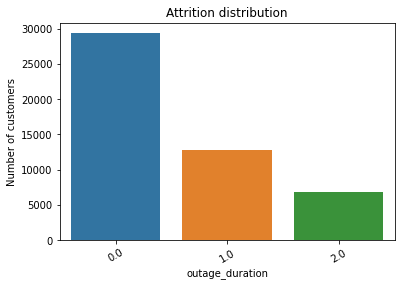

In [41]:
#Visualising the target
sns.countplot(x='outage_duration',data=df_merged_Final)
plt.xticks(rotation=30)
plt.title('Attrition distribution')
plt.ylabel('Number of customers')
plt.show()

This plot confirms that there is no imbalance in the data.

**Ploting between Numerical and target attribute**

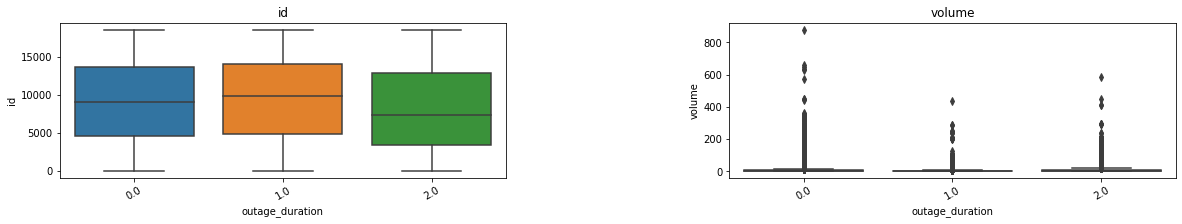

In [43]:
fig=plt.figure(figsize=(20,20))
fig.subplots_adjust(wspace=0.5,hspace=1)
num_columns=df_merged_Final.select_dtypes(exclude=['category','object']).columns

for i,value in enumerate(num_columns):
    plt.subplot(4,2,(i+1))
    plt.xticks(rotation=30)
    plt.title(value)
    sns.boxplot(x='outage_duration',y=value,data=df_merged_Final)
plt.show()

**Ploting between categorical and target attribute**

<Figure size 504x504 with 0 Axes>

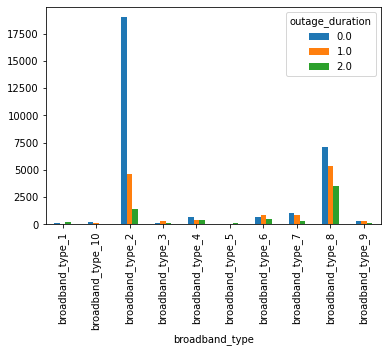

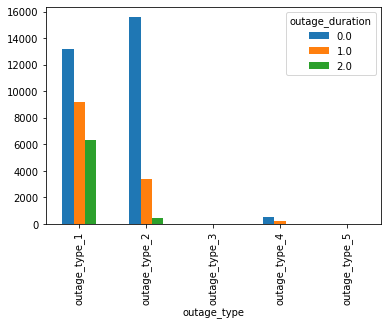

In [45]:
fig = plt.figure(figsize=(7,7))
fig.subplots_adjust(wspace=0.5,hspace=1)
cat_columns=['broadband_type','outage_type']

for value in cat_columns:
    if value!= 'outage_duration':
        data_plot=pd.crosstab(df_merged_Final[value],df_merged_Final['outage_duration'])
        data_plot.plot(kind='bar')
        plt.xticks(rotation=90)
        plt.show()

* Most of the customers uses 'braodband_type_2' which is 'ADSL 2' with most 25074 customers (Unique or same customers) followed by 'braodband_type_8' which is 'ADSL 1'.
* Least used broadband_type is 'type-5'
* Most of the 'outage_type' is of type-1 follwed by type-2

### Collecting top 5 log_report type and visualising the outage duration

In [80]:
log_df= (df_merged_Final.groupby('log_report_type').count().reset_index()).sort_values(by='id',ascending=False).head(5)

In [81]:
list1=[]
for i in log_df['log_report_type']:
  list1.append(i)
list1

['log_report_type_312',
 'log_report_type_232',
 'log_report_type_82',
 'log_report_type_134',
 'log_report_type_203']

In [82]:
df2 = df_merged_Final[df_merged_Final.log_report_type.isin(list1)]


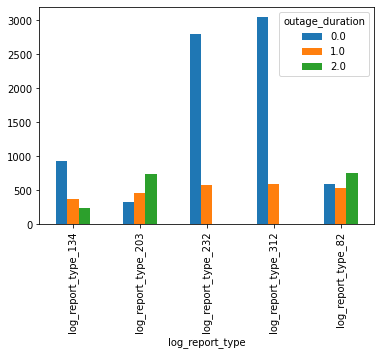

In [83]:
data_plot123=pd.crosstab(df2['log_report_type'],df_merged_Final['outage_duration'])
data_plot123.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

In the log_report_type_232 and type 312. We could observe that no visual log is  generated for outage_duration 2.

### Collecting top 5 transit_server_type and visualising the outage duration

In [84]:
log_df= (df_merged_Final.groupby('transit_server_type').count().reset_index()).sort_values(by='id',ascending=False).head(5)

In [85]:
list1=[]
for i in log_df['transit_server_type']:
  list1.append(i)
list1

['transit_server_type_11',
 'transit_server_type_35',
 'transit_server_type_34',
 'transit_server_type_15',
 'transit_server_type_20']

In [90]:
df2 = df_merged_Final[df_merged_Final.transit_server_type.isin(list1)]

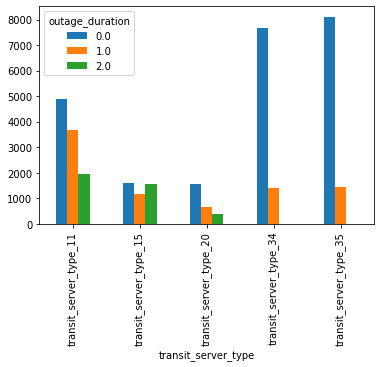

In [91]:
data_plot123=pd.crosstab(df2['transit_server_type'],df_merged_Final['outage_duration'])
data_plot123.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

In the transit_server_type_34 and type 35. We could observe that no visual log is  generated for outage_duration 2

### Collecting top 5 area and visualising the outage duration

In [96]:
log_df= (df_merged_Final.groupby('area_code').count().reset_index()).sort_values(by='id',ascending=False).head(5)
log_df2= (df_merged_Final.groupby('area_code').count().reset_index()).sort_values(by='id',ascending=True).head(5)

In [98]:
list1=[]
list2=[]
for i in log_df['area_code']:
  list1.append(i)
for i in log_df2['area_code']:
  list2.append(i)
print(list1)
print(list2)

['area_794', 'area_821', 'area_126', 'area_734', 'area_802']
['area_659', 'area_27', 'area_683', 'area_550', 'area_930']


In [99]:
df2 = df_merged_Final[df_merged_Final.area_code.isin(list1)]
df3 = df_merged_Final[df_merged_Final.area_code.isin(list2)]

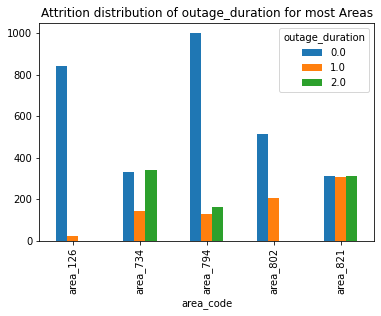

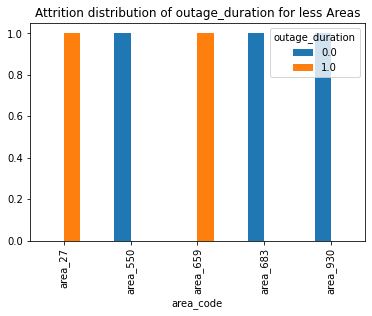

In [104]:
data_plot123=pd.crosstab(df2['area_code'],df_merged_Final['outage_duration'])
data_plot123.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Attrition distribution of outage_duration for most Areas')

data_plot123=pd.crosstab(df3['area_code'],df_merged_Final['outage_duration'])
data_plot123.plot(kind='bar')
plt.xticks(rotation=90)

plt.title('Attrition distribution of outage_duration for less Areas')
plt.show()

* The area_821 has all the outages uniformly. So our company need to concentrate more on area_821
* Follwed by area_734
* The areas 'area_126' and 'area_802' observed no outage of type 2. 
* And the area_550,area_683,area_930 observed no durations. 

# EDA ANSWERS

# **Splitting the data into train and test**

In [105]:
#Module to split to data
from sklearn.model_selection import train_test_split

In [106]:
X = df_merged_Final.loc[:,df_merged_Final.columns!='outage_duration']
Y = df_merged_Final.loc[:,'outage_duration']

In [107]:
X_train, X_Valid, Y_train, Y_Valid = train_test_split(X, Y, test_size=0.2, random_state=123) 

In [108]:
X_train.shape, X_Valid.shape, Y_train.shape, Y_Valid.shape

((39178, 7), (9795, 7), (39178,), (9795,))

In [109]:
print(X_train.shape)
X_train.nunique()


(39178, 7)


id                     5699
broadband_type           10
outage_type               5
log_report_type         308
volume                  235
transit_server_type      49
area_code               861
dtype: int64

In [110]:
print(X_Valid.shape)
X_Valid.nunique()

(9795, 7)


id                     3643
broadband_type           10
outage_type               5
log_report_type         278
volume                  165
transit_server_type      47
area_code               702
dtype: int64